In [ ]:
# Reads SNAP monthly data
# Get DayMet daily data (1985-2015)
# Find trend in SNAP data
# Get daily variations from DayMet and 100 years trend from SNAP

In [ ]:
#%matplotlib 

In [1]:
import numpy as np
import h5py
#from tifffile import TiffFile
#import tifffile as tf
from skimage.io import imread
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import sys
from calendar import monthrange

/Users/ajc/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
daymet = h5py.File(os.path.join("barrow1985-2015-trend.h5"),'r')
keys = list(daymet.keys())
daymet_daily = dict()
daymet_annual_ave = dict()
daymet_annual_trend = dict()

for key in keys:
    temp = dict()
    name = "%s"%key
    temp ["%s"%key]= daymet[key][:]
    daymet_daily = {**daymet_daily, **temp}
    #dm_daily.update(temp) # append dictionaries in python 2.0
    daymet_annual_ave[key] = daymet_daily[key].reshape((-1,365)).mean(axis=1)
    

daymet_daily['time [s]'] = 1985 + daymet_daily['time [s]'] / (86400.*365)

for k,d in daymet_annual_ave.items():
    poly_ = np.polyfit(daymet_annual_ave['time [s]'], daymet_annual_ave[k],1)
    poly = np.poly1d(poly_)
    daymet_annual_trend[k] = poly(daymet_annual_ave['time [s]'])
    
daymet_annual_trend['time [s]'] = 1985 + daymet_annual_trend['time [s]'] / (86400.*365)

# total precipitation 
daymet_annual_ave['precipitation [m s^-1]'] = daymet_annual_ave['precipitation rain [m s^-1]'] + daymet_annual_ave['precipitation snow [m SWE s^-1]']
#daymet_annual_ave['precipitation'] = daymet_annual_ave['precipitation'] * 1000*365*86400
daymet_daily['precipitation [m s^-1]'] = daymet_daily['precipitation rain [m s^-1]'] + daymet_daily['precipitation snow [m SWE s^-1]']
daymet_annual_trend['precipitation [m s^-1]'] = daymet_annual_trend['precipitation rain [m s^-1]'] + daymet_annual_trend['precipitation snow [m SWE s^-1]']
#plt.plot(daymet_annual_trend['time [s]'] , daymet_annual_ave['precipitation'], 'r-x',label='DM annual ave')
#plt.show()

In [3]:
#Loop over DayMet Data
#daymet_
#d = np.concatenate((d,)*4)

['air temperature [K]', 'incoming shortwave radiation [W m^-2]', 'precipitation [m s^-1]', 'relative humidity [-]', 'time [s]']
air temperature [K]
incoming shortwave radiation [W m^-2]
precipitation [m s^-1]
relative humidity [-]
time [s]


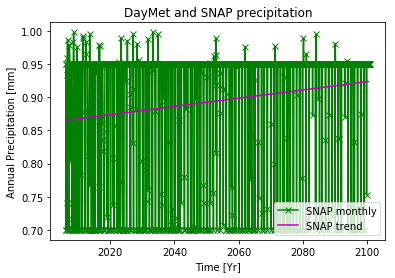

In [4]:
#SNAP Data

snap_data = h5py.File(os.path.join("snap-2006-2100-monthly.h5"),'r')
keys = list(snap_data.keys())
print (keys)
snap_monthly = dict()
snap_annual_ave = dict()
snap_annual_trend = dict()

for key in keys:
    temp = dict()
    name = "%s"%key
    #print (name)
    temp ["%s"%key]= snap_data[key][:]
    snap_monthly = {**snap_monthly, **temp}
    #snap_monthly.update(temp)
    snap_annual_ave[key] = snap_monthly[key].reshape((-1,12)).mean(axis=1)

for k,d in snap_annual_ave.items():
    print (k)
    poly_ = np.polyfit(snap_annual_ave['time [s]'], snap_annual_ave[k],1)
    poly = np.poly1d(poly_)
    snap_annual_trend[k] = poly(snap_annual_ave['time [s]'])
    #snap_annual_trend_adj[k] = poly(snap_annual_ave['time [s]'])

snap_annual_trend['air temperature [K]'] = 3.1 + snap_annual_trend['air temperature [K]']

for k,d in snap_annual_trend.items():
    
    if k == 'air temperature [K]' and False:
        #plt.plot(snap_monthly['time [s]'] , snap_monthly[k], 'r', label='SNAP monthly')
        plt.plot(snap_annual_trend['time [s]'] , snap_annual_ave[k], 'g-x', label='SNAP annual ave')
        plt.plot(snap_annual_trend['time [s]'] , snap_annual_trend[k], c='m', label='SNAP orig trend')
        #plt.plot(snap_annual_trend['time [s]'] , snap_annual_trend_adj[k], c='c',label ='SNAP scaled')
        #plt.plot(snap_annual_trend['time [s]'] , snap_annual_trend[k], c='r-x')
    elif k == 'precipitation [m s^-1]' and False:
        #snap_annual_ave[k] = snap_annual_ave[k]*1000*365*86400
        #snap_annual_trend[k] = snap_annual_trend[k]*1000*365*86400
        plt.plot(snap_annual_ave['time [s]'] , snap_annual_ave[k], 'g-x', label='SNAP annual ave')
        plt.plot(snap_annual_trend['time [s]'] , snap_annual_trend[k], c='m', label='SNAP trend')
        plt.ylabel('Annual ave. precipitation [mm]')
        plt.title('DayMet and SNAP Annual Average Precipitation')
    elif k == 'incoming shortwave radiation [W m^-2]' and False:
        plt.plot(snap_monthly['time [s]'] , snap_monthly[k], 'g-x', label='SNAP monthly')
        plt.legend()
        plt.xlabel('Time [Yr]')
        plt.ylabel('Incoming shortwave radiation [W m^-2]')

        plt.legend(loc='lower right')
        plt.title('DayMet and SNAP SWR')
        plt.savefig('dm-snap-1895-2100-AT-2.png',bbox_inches="tight",dpi=250,figsize=(12,12))
        plt.show()
    elif k == 'relative humidity [-]':# and False:
        plt.plot(snap_monthly['time [s]'] , snap_monthly[k], 'g-x', label='SNAP monthly')
        plt.plot(snap_annual_trend['time [s]'] , snap_annual_trend[k], c='m', label='SNAP trend')
    plt.legend()
    plt.xlabel('Time [Yr]')
    plt.ylabel('Annual Precipitation [mm]')

    plt.legend(loc='lower right')
    plt.title('DayMet and SNAP precipitation')
    #plt.savefig('dm-snap-1895-2100-AT-2.png',bbox_inches="tight",dpi=250,figsize=(12,12))
plt.show()



In [5]:
daymet_daily100 = dict()
daymet_annual_trend100 = dict()
for key, d in daymet_daily.items():
    dat = np.concatenate((d,)*4)
    daymet_daily100[key] = dat
    
for key, d in daymet_annual_trend.items():
    dat = np.concatenate((d,)*4)
    daymet_annual_trend100[key] = dat
    

In [6]:
snap_daily_data = dict()

#snap_time = np.array([2006 + t/365. for t in snap_time])
#snap_time = np.array(snap_time)

snap_d1 = np.array(np.zeros((95*365)))
#snap_d1 = np.array(snap_d1)

#snap_daily_data = dict(T = snap_d1)
#snap_daily_data['time'] = snap_time
#print (len(daymet_annual_ave['precipitation [m s^-1]']))

for key,d in snap_annual_trend.items():
    d1 = []
    print (key)
    for i in range(95):
        for j in range(365):
            index = i*365 + j
            x = daymet_daily100[key][index] - daymet_annual_trend100[key][i] + snap_annual_trend[key][i]
            d1.append(x)
    snap_daily_data[key] = d1
    

air temperature [K]
incoming shortwave radiation [W m^-2]
precipitation [m s^-1]
relative humidity [-]
time [s]


dict_keys(['air temperature [K]', 'incoming shortwave radiation [W m^-2]', 'precipitation [m s^-1]', 'relative humidity [-]', 'time [s]'])


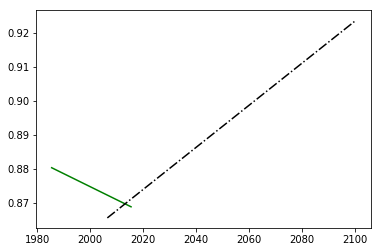

In [28]:
plt.close()
print (snap_annual_trend.keys())
#plt.plot(daymet_daily['time [s]'],daymet_daily['air temperature [K]'], 'c', label='SNAP daily')
#plt.plot(daymet_annual_trend['time [s]'],daymet_annual_trend['air temperature [K]'], 'g', label='SNAP daily')
#plt.plot(snap_daily_data['time [s]'],snap_daily_data['air temperature [K]'], 'r', label='SNAP daily')
#plt.plot(snap_annual_trend['time [s]'],snap_annual_trend['air temperature [K]'], 'k-.', label='SNAP trend')


#plt.plot(daymet_daily['time [s]'],daymet_daily['relative humidity [-]'], 'c', label='SNAP daily')
plt.plot(daymet_annual_trend['time [s]'],daymet_annual_trend['relative humidity [-]'], 'g', label='SNAP daily')
#plt.plot(snap_daily_data['time [s]'],snap_daily_data['relative humidity [-]'], 'r', label='SNAP daily')
plt.plot(snap_annual_trend['time [s]'],snap_annual_trend['relative humidity [-]'], 'k-.', label='SNAP trend')

plt.show()

In [23]:
l = len(snap_daily_data['precipitation [m s^-1]'])
rain = np.zeros((l,1))
snow = np.zeros((l,1))
for i,d in enumerate(snap_daily_data['air temperature [K]']):
    if d > 273.15:
        rain[i] = round(snap_daily_data['precipitation [m s^-1]'][i],14)
    else:
        snow[i] = round(snap_daily_data['precipitation [m s^-1]'][i], 14)
snap_daily_data['precipitation rain [m s^-1]'] = rain
snap_daily_data['precipitation snow [m SWE s^-1]'] = snow

RH = []
for d in snap_daily_data['relative humidity [-]']:
    if d < 0.7:
        RH.append(0.7)
    elif(d > 1.0):
        RH.append(1.0)
    else:
        RH.append(round(d,4))
        
# Using the same RH (no )
snap_daily_data['relative humidity [-]'] = RH

snap_time = np.arange(0,95*365,1)
snap_time = [t*86400. for t in snap_time]
snap_daily_data['time [s]'] = snap_time

snap_daily_data['wind speed [m s^-1]'] = daymet_daily100['wind speed [m s^-1]'][:len(snap_time)]
snap_daily_data['incoming shortwave radiation [W m^-2]'] = daymet_daily100['incoming shortwave radiation [W m^-2]'][:len(snap_time)]
snap_daily_data['incoming longwave radiation [W m^-2]'] = daymet_daily100['incoming longwave radiation [W m^-2]'][:len(snap_time)]

In [24]:
outfile = h5py.File('snap-2006-2100-daily.h5','w')

for key, d in snap_daily_data.items():
    print (key)
    if 'precipitation [m s^-1]' not in key:
        outfile.create_dataset(key, data=d)

outfile.close()

        


air temperature [K]
incoming shortwave radiation [W m^-2]
precipitation [m s^-1]
relative humidity [-]
time [s]
precipitation rain [m s^-1]
precipitation snow [m SWE s^-1]
wind speed [m s^-1]
incoming longwave radiation [W m^-2]
